In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import display as ipython_display

import sys
import os
import pickle
import astropy.units as u
dir_current = globals()['_dh'][0]
dir_repo = dir_current+'/../..'
dir_BinnedFit = dir_repo+"/BinnedFit"
dir_KLens = dir_repo+"/KLens"
dir_TNGcube = dir_repo+"/TNGcube"

sys.path.append(dir_BinnedFit)
from binnedFit_utilities import lambda_to_velocity, velocity_to_lambda, load_pickle
from gamma import GammaInference
from chainTool import ChainTool

sys.path.append(dir_TNGcube)
from TNGcube import TNGmock, ParametersTNG

Populating the interactive namespace from numpy and matplotlib


# load ChainInfo

In [2]:
dir_file = '/Users/hhg/Research/kinematic_lensing/data/mock_TNG/slit0_90/'
#dir_file = '/Users/hhg/Research/kinematic_lensing/data/mock_TNG/'

chainfile = dir_file +'chainTNG_Ha_noise0_g10.05_g20.05_sini0.7_z0.30_thetaINT0.0_256_300k_D0521.pkl'

chainInfo = load_pickle(chainfile)
print(chainInfo['chain'].shape)

(100, 3000, 10)


# init TNG mock to reproduce mock data

In [3]:
pars = chainInfo['par_fid']
par_key = ['g1','g2','sini','vcirc','theta_int','redshift','sigma_thermal',
           'slitWidth','slitAngles','ngrid', 'subGridPixScale', 'nm_per_pixel',
           'flux','ref_SDSS_lineL', 'expTime', 'area']

for item in par_key:
    if isinstance(pars[item], (list, np.ndarray)):
        print('slitAngles : ')
        print(f'    major : f{pars[item][0]*180./np.pi : .2f}')
        print(f'    minor : f{pars[item][1]*180./np.pi : .2f}')
    elif item == 'ref_SDSS_lineL':
        print(item+' : ', pars[item])
    else:
        print(item+' : ', f'{pars[item]:.2f}')

g1 :  0.05
g2 :  0.05
sini :  0.70
vcirc :  121.59
theta_int :  0.00
redshift :  0.30
sigma_thermal :  16.00
slitWidth :  0.12
slitAngles : 
    major : f 0.00
    minor : f 90.00
ngrid :  256.00
subGridPixScale :  0.06
nm_per_pixel :  0.03
flux :  2000.43
ref_SDSS_lineL :  3e-17
expTime :  1800.00
area :  785000.00


In [4]:
subhalo = pickle.load(open('../notebooks/subhalo_35.pkl', 'rb'))
mock = TNGmock(pars=pars, subhalo=subhalo, par_meta=None, auto_tune=True)

residual PA = 6.885 deg. (auto-corrected)
residual center offset: (-0.029, -0.034) [arcsec] (auto-corrected)
residual center offset: (-0.115, -0.137) [ckpc] (auto-corrected)


In [5]:
dataInfo = mock.gen_mock_data(noise_mode=0)

# 0. View mock data 

/Users/hhg/Research/kinematic_lensing/repo/TNGcube/notebooks/../../TNGcube/TNGcube.py:835: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1da096850>)

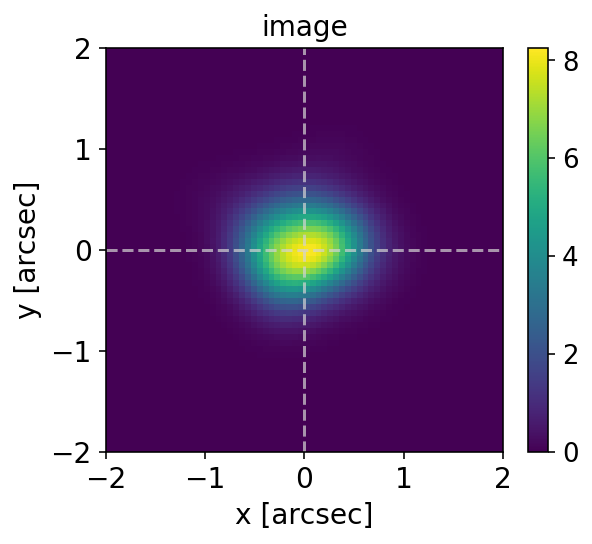

In [6]:
dataInfo['image'].display(xlim=[-2., 2.])

/Users/hhg/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


time cost in gaussFit_spec2D: 0.33129000663757324 (secs)


/Users/hhg/Research/kinematic_lensing/repo/TNGcube/notebooks/../../BinnedFit/spec2D.py:216: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 468x324 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1da31fe10>)

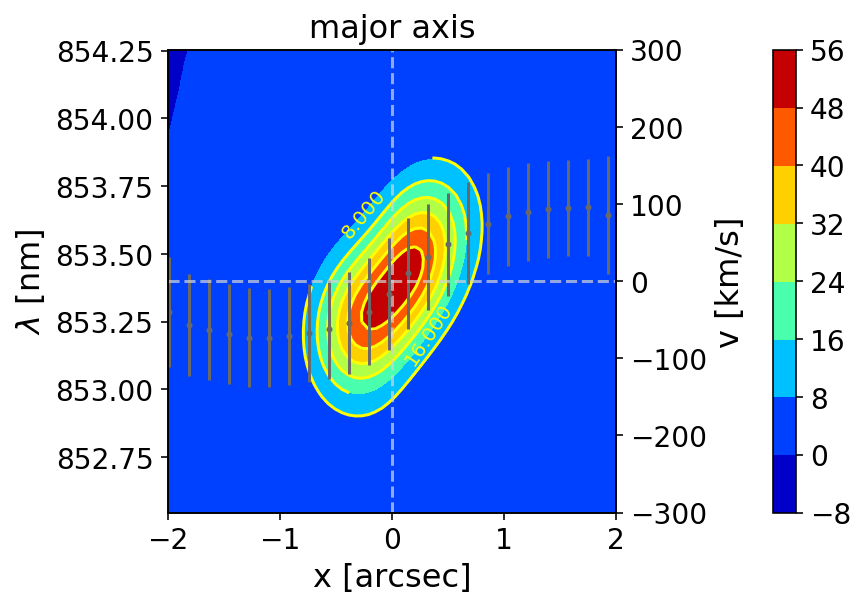

In [7]:
model_major = dataInfo['spec'][0].GF.model
dataInfo['spec'][0].display(xlim=[-2., 2], vlim=[-300, 300], mark_fit=True, model=model_major, title='major axis')

time cost in gaussFit_spec2D: 0.3669588565826416 (secs)


(<Figure size 468x324 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1c909aa10>)

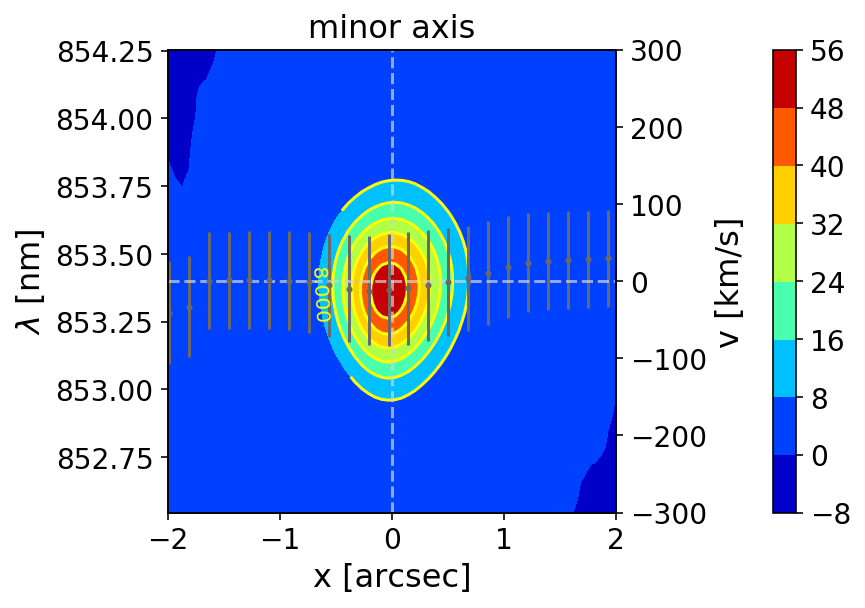

In [8]:
model_minor = dataInfo['spec'][1].GF.model
dataInfo['spec'][1].display(xlim=[-2., 2], vlim=[-300, 300], mark_fit=True, model=model_minor, title='minor axis')

# Plot chains

In [9]:
Chain = ChainTool(chainInfo, Nburn=100*1500, Nend=100*3000) ; Chain.add_vsini()

In [10]:
from chainconsumer import ChainConsumer
blue        = "#214F94"
red         = "#CC0204"
yellow      = "#FFA903"
gray        = "#858278"
black       = "#000000"
green       = "#73ab24"
purple      = "#8600C8"
lightblue   = "#6898FF"
lightblue2  = "#82b9e6"
yellowgreen = "#8dcd32" #"#8DE900"
lightteal   = "#7FC2BF"
teal        = "#51ABAE"
lightgray   = "#CDCDCD"

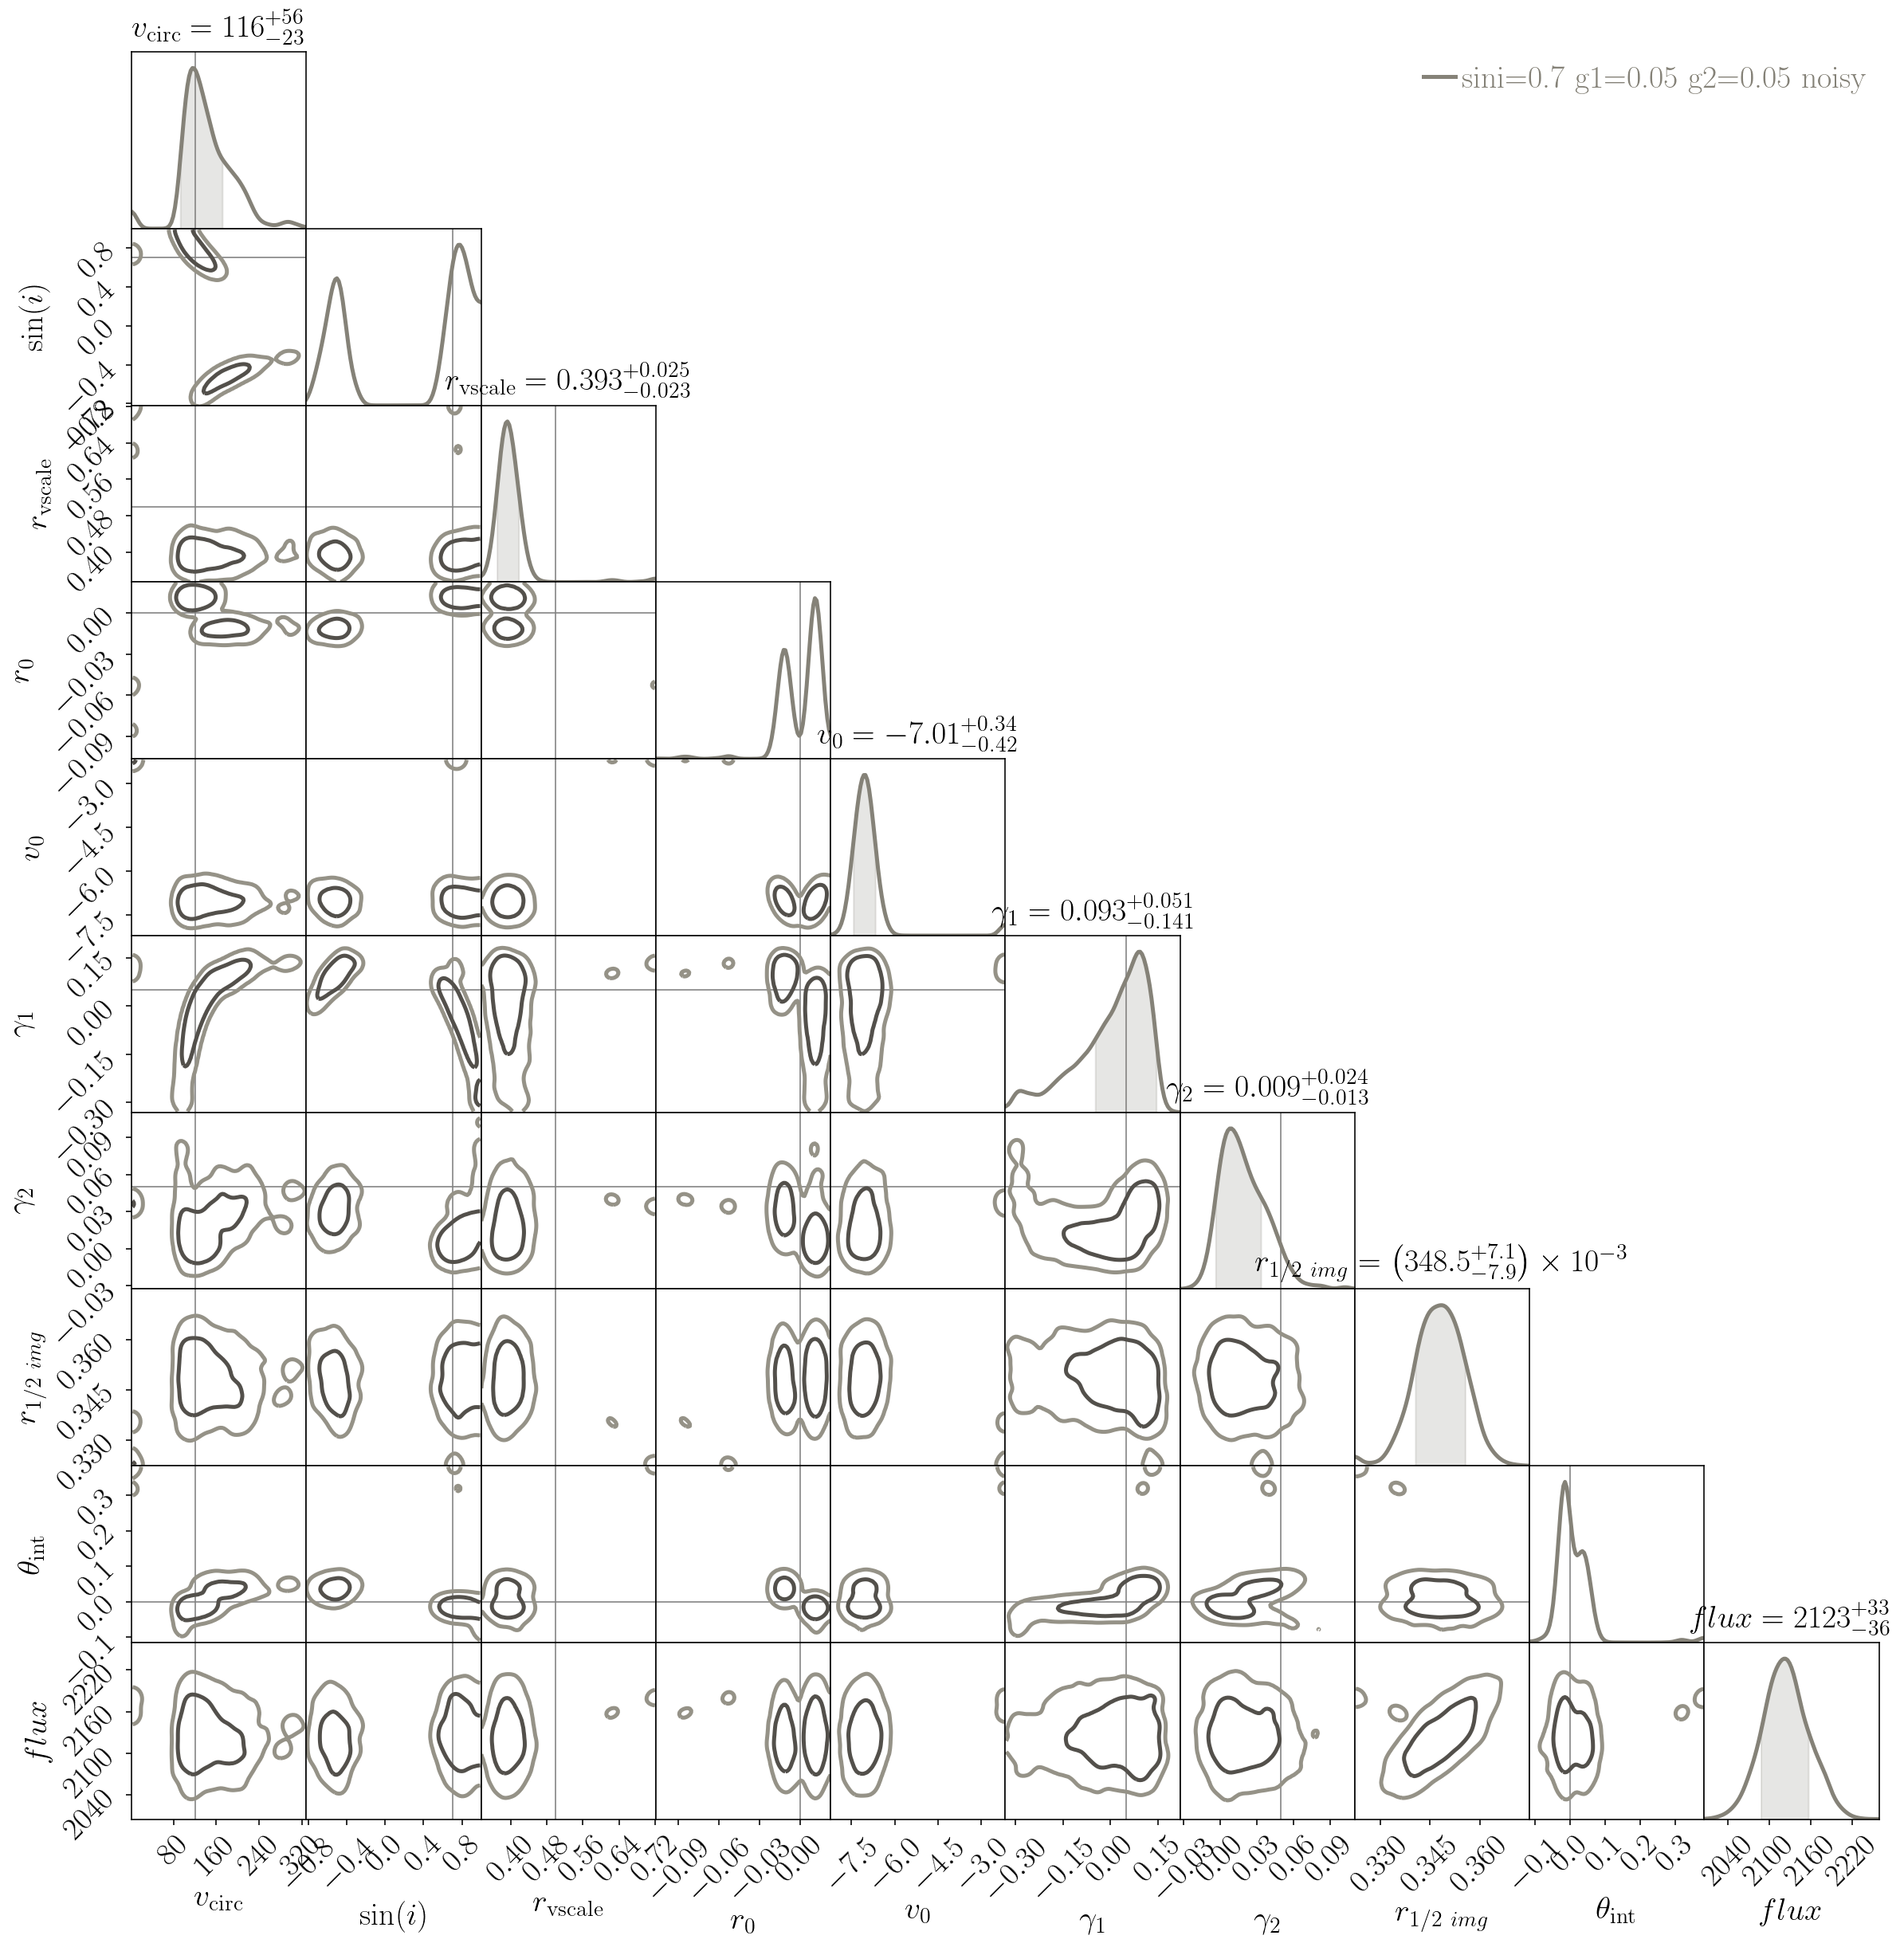

In [11]:
Nchains = 1
colors = [gray, lightblue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '-.', "--", "-.", '-', ":", "--", ':']

statistics="max"

select_par_key = chainInfo['par_key']

#legend_chain = "sini=%.1f"%pars['sini']
g1=pars['g1']
g2=pars['g2']
sini=pars['sini']
legend_chain = f"sini={sini} g1={g1} g2={g2}"

parID1, parName1, par_x1 = Chain.select_par_info(select_par_key)

c = ChainConsumer()
#c.add_chain(Chain0.chain[:, parID1], parameters=parName1, name=legend_chain+' noiseless')
c.add_chain(Chain.chain[:, parID1], parameters=parName1, name=legend_chain+' noisy')

c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=20,tick_font_size=20,
            shade=[False]*Nchains, colors=colors, linestyles = lines,
            statistics=statistics,summary=True)

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
par_x1[-1]=5000. ; par_x1[-3]=4.

fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(2.5 + fig.get_size_inches())
fig.savefig("_fig_chain.pdf", transparent=True)

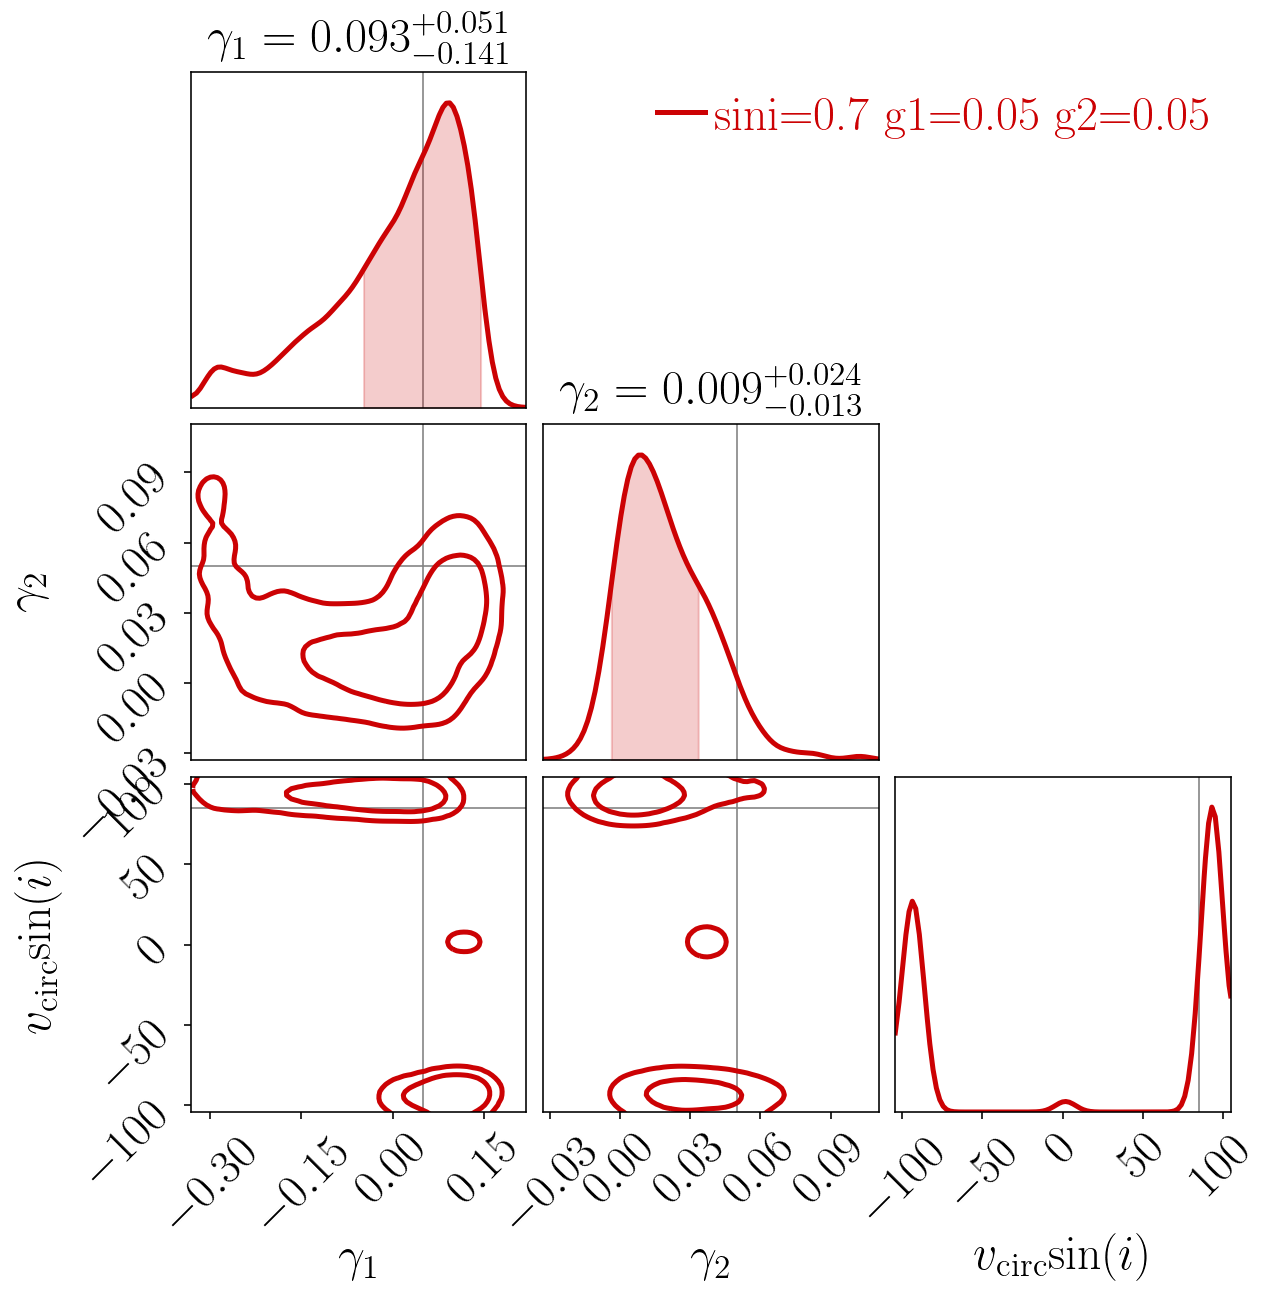

In [12]:
Nchains = 1
colors = [red, blue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

select_par_key = ['g1','g2', 'vsini'] #, 'v_0'

legend_chain = f"sini={pars['sini']} g1={pars['g1']} g2={pars['g2']}"


parID1,parName1,par_x1 = Chain.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain.chain[:, parID1]    , parameters=parName1 ,name=legend_chain)

c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=24,tick_font_size=24,
            shade=[False]*Nchains,
            colors=colors,
            linestyles=lines,
            statistics=statistics,
            shade_gradient=[0]*Nchains,
            summary=True) #,color_params='posterior'

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.14, right=0.9, bottom=0.14, top=0.9)

fig.set_size_inches(5.0 + fig.get_size_inches())
fig.savefig("_figchain.pdf", transparent=True)

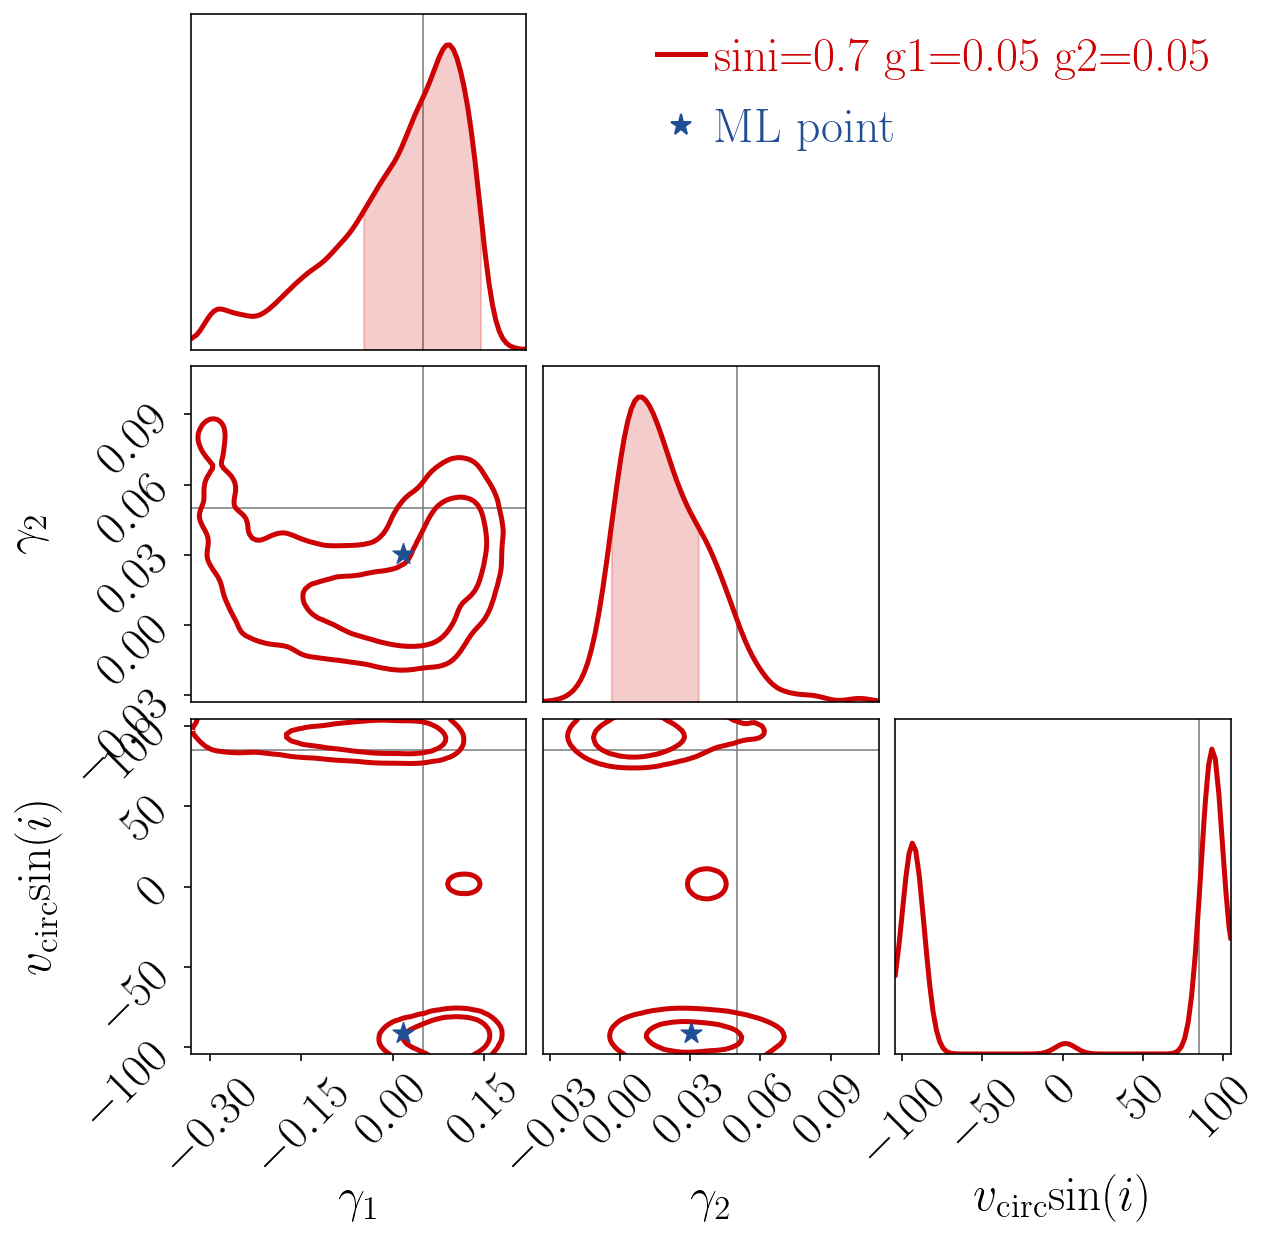

In [13]:
Nchains = 2
colors = [red, blue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

select_par_key = ['g1','g2', 'vsini'] #, 'v_0'

legend_chain = f"sini={pars['sini']} g1={pars['g1']} g2={pars['g2']}"


parID1,parName1,par_x1 = Chain.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain.chain[:, parID1]    , parameters=parName1 ,name=legend_chain)

MLmain, MLmain0 = Chain.par_maxlike()
c.add_marker(MLmain[parID1], parameters=parName1, marker_style='*', marker_size=120, name='ML point') #

c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=24,tick_font_size=24,
            shade=[False]*Nchains,
            colors=colors,
            linestyles=lines,
            statistics=statistics,
            shade_gradient=[0]*Nchains,
            summary=True) #,color_params='posterior'

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.14, right=0.9, bottom=0.14, top=0.9)

fig.set_size_inches(5.0 + fig.get_size_inches())
fig.savefig("_figchain1.pdf", transparent=True)

# ML point

In [19]:
MLmain, MLmain0 = Chain.par_maxlike()

print('maximum logLike: ', f'{MLmain0:.3f}')

for ind, key in enumerate(chainInfo['par_key']):
    print(f'{key} : {MLmain[ind]:.2f}')

maximum logLike:  -124.729
vcirc : 130.97
sini : -0.70
vscale : 0.38
r_0 : -0.01
v_0 : -6.89
g1 : 0.02
g2 : 0.03
r_hl_image : 0.35
theta_int : 0.04
flux : 2113.15


# check fit status at par_in

In [20]:
GI = GammaInference(dataInfo, 
                    active_par_key=['vcirc', 'sini', 'vscale', 'r_0', 'v_0', 'g1', 'g2',  'r_hl_image', 'theta_int', 'flux'], 
                    par_fix=None, vTFR_mean=120.)

In [21]:
active_par_fid = [GI.par_fid[key] for key in GI.active_par_key]

print('par fid')
for ind, key in enumerate(GI.active_par_key):
    print(f'  {key} : {active_par_fid[ind]:.2f}')

par fid
  vcirc : 121.59
  sini : 0.70
  vscale : 0.50
  r_0 : 0.00
  v_0 : 0.00
  g1 : 0.05
  g2 : 0.05
  r_hl_image : 0.50
  theta_int : 0.00
  flux : 2000.39


In [22]:
active_par_in = MLmain
#active_par_in = active_par_fid

par_in = GI.Pars.gen_par_dict(active_par=active_par_in, active_par_key=GI.active_par_key, par_ref=GI.par_base)

print('par ML')
for ind, key in enumerate(GI.active_par_key):
    print(f'  {key} : {active_par_in[ind]:.2f}')
    
logPrior_vcirc = GI.Pars.logPrior_vcirc(vcirc=par_in['vcirc'], sigma_TF_intr=GI.sigma_TF_intr, vTFR_mean=GI.vTFR_mean)
logL_image, model_img = GI._cal_loglike_image(par_in)
logL_spec0, model_spec0 = GI._cal_loglike_spec(par_in, IDspec=0)
logL_spec1, model_spec1 = GI._cal_loglike_spec(par_in, IDspec=1)

totL = GI.cal_loglike(active_par_in)
print(f'tot logLike: {totL:.2f}')
print(f'  logPrior: {logPrior_vcirc:.2f}')
print(f'  logL_image: {logL_image:.2f}')
print(f'  logL_spec0: {logL_spec0:.2f}')
print(f'  logL_spec1: {logL_spec1:.2f}')

par ML
  vcirc : 130.97
  sini : -0.70
  vscale : 0.38
  r_0 : -0.01
  v_0 : -6.89
  g1 : 0.02
  g2 : 0.03
  r_hl_image : 0.35
  theta_int : 0.04
  flux : 2113.15
tot logLike: -295.77
  logPrior: -0.11
  logL_image: -137.94
  logL_spec0: -54.85
  logL_spec1: -102.87


In [23]:
#dataInfo = mock.gen_mock_data(noise_mode=0)

# image SNR
SNR_image=np.sqrt(np.sum(dataInfo['image'].array**2/dataInfo['image'].array_var))

# spec major SNR
SNR_spec0 = np.sqrt(np.sum(dataInfo['spec'][0].array**2/dataInfo['spec'][0].array_var))

# spec minor SNR
SNR_spec1 = np.sqrt(np.sum(dataInfo['spec'][1].array**2/dataInfo['spec'][1].array_var))

print('Data SNR info: ')
print(f'  image SNR: {SNR_image:.2f}')
print(f'  spec major SNR: {SNR_spec0:.2f}')
print(f'  spec minor SNR: {SNR_spec1:.2f}')
print('\n')
image_array_var = dataInfo['image'].array_var
image_tot_signal = np.sqrt(np.sum(dataInfo['image'].array**2))
print('image tot. |signal|:', f'{image_tot_signal:.2f}')
print('image.array_var:', f'{image_array_var:.2f}')

spec0_tot_signal = np.sqrt(np.sum(dataInfo['spec'][0].array**2))
spec1_tot_signal = np.sqrt(np.sum(dataInfo['spec'][1].array**2))

print('spec major tot. |signal|:', f'{spec0_tot_signal:.2f}')
print('spec minor tot. |signal|:', f'{spec1_tot_signal:.2f}')

Data SNR info: 
  image SNR: 100.00
  spec major SNR: 377.70
  spec minor SNR: 324.95


image tot. |signal|: 92.93
image.array_var: 0.86
spec major tot. |signal|: 665.78
spec minor tot. |signal|: 572.69


## display fit at par_in

/Users/hhg/Research/kinematic_lensing/repo/TNGcube/notebooks/../../TNGcube/TNGcube.py:835: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


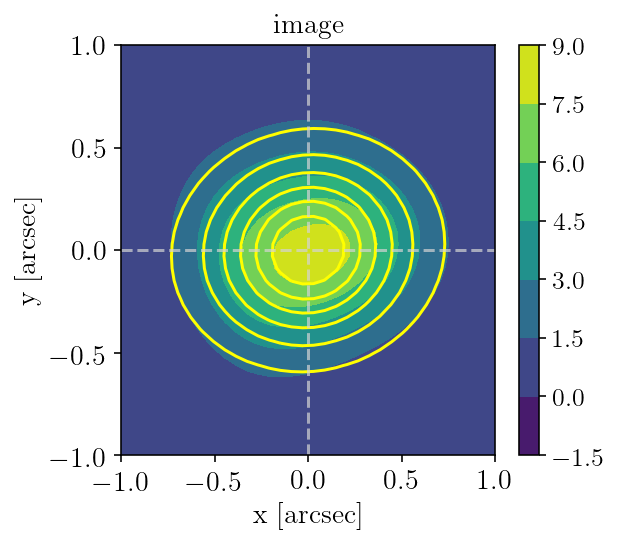

In [24]:
fig0, ax0 = dataInfo['image'].display(xlim=[-1.,1.], model=model_img)

/Users/hhg/Research/kinematic_lensing/repo/TNGcube/notebooks/../../BinnedFit/spec2D.py:216: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


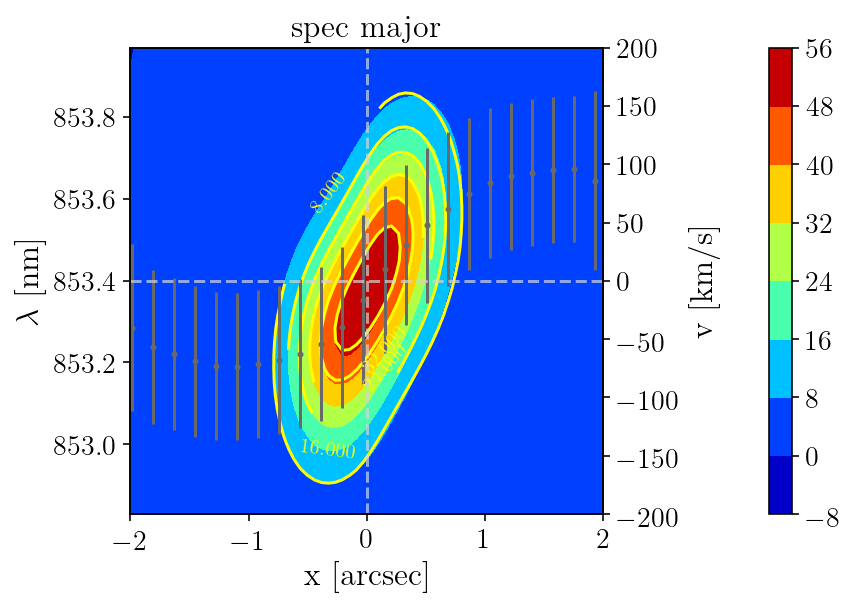

In [25]:
fig1, ax1 = dataInfo['spec'][0].display(xlim=[-2.,2.], vlim=[-200., 200,], model=model_spec0, mark_fit=True, title='spec major')

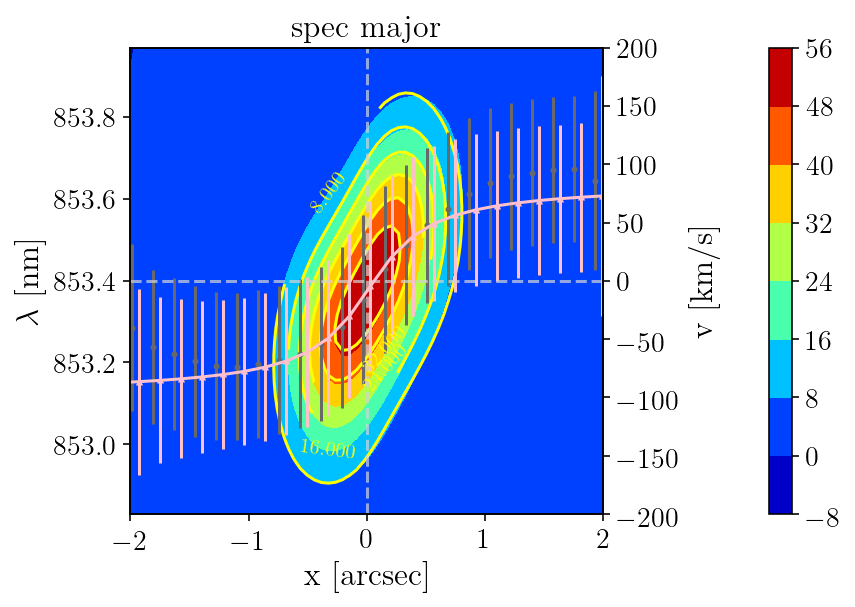

In [26]:
cenLambda, amp, sigma = GI._cal_bestfit_specStats(par_in, IDspec=0)
spaceGrid = GI.RFs[0].spec2D.spaceGrid
ax1.errorbar(spaceGrid[2::3], cenLambda[2::3], sigma[2::3], color='pink', marker='^', markersize=2, ls='-')
ipython_display(fig1)

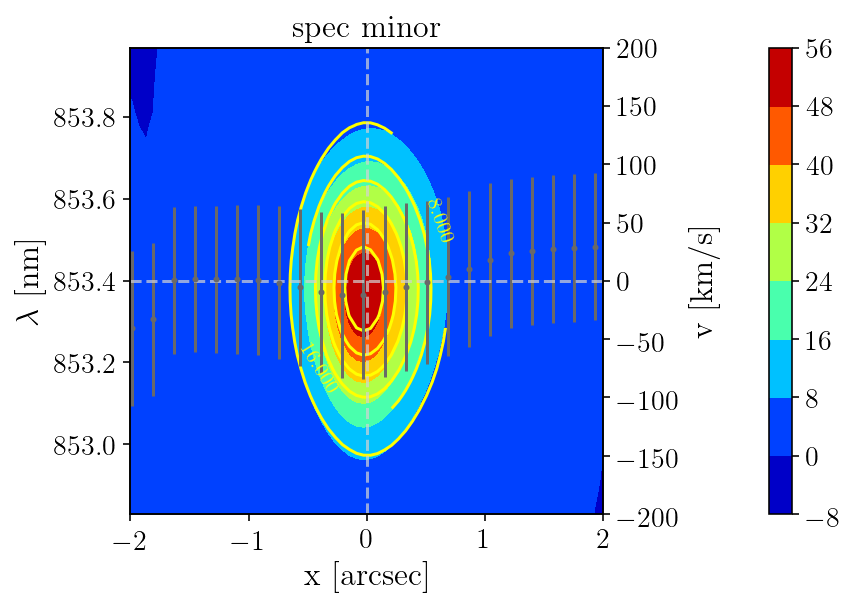

In [27]:
fig2, ax2 = dataInfo['spec'][1].display(xlim=[-2.,2.], vlim=[-200., 200,], model=model_spec1, mark_fit=True, title='spec minor')

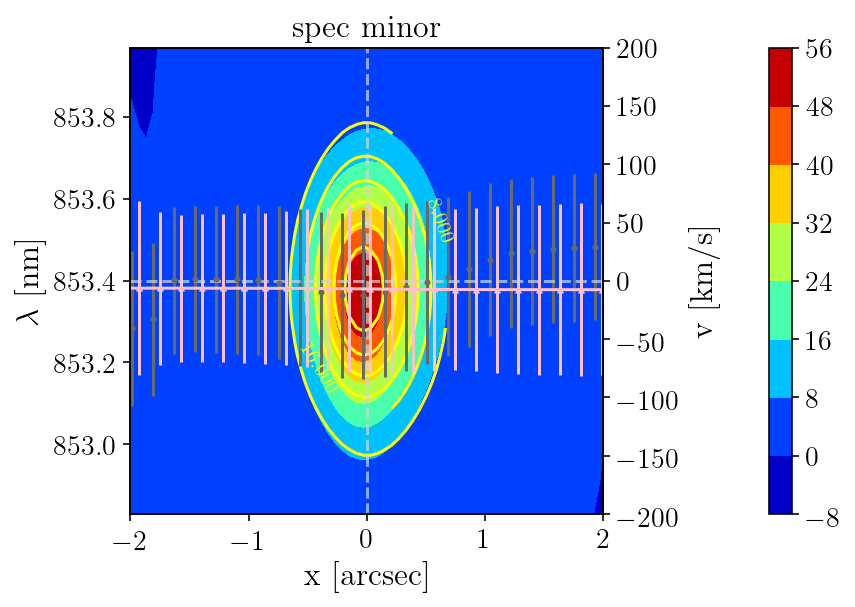

In [28]:
cenLambda, amp, sigma = GI._cal_bestfit_specStats(par_in, IDspec=1)
spaceGrid = GI.RFs[1].spec2D.spaceGrid
ax2.errorbar(spaceGrid[2::3], cenLambda[2::3], sigma[2::3], color='pink', marker='^', markersize=2, ls='-')
ipython_display(fig2)

#  ------ End ------

In [29]:
chainInfo = GI.run_MCMC(Nwalker=30, Nsteps=2, outfile_MCMC='chain.pkl', save_step_size=2)

  0%|          | 0/2 [00:00<?, ?it/s]/Users/hhg/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


RuntimeError for pos_id: 38. Set best-fit gaussian amp. = 0


 50%|█████     | 1/2 [00:03<00:03,  3.32s/it]/Users/hhg/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/hhg/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
100%|██████████| 2/2 [00:06<00:00,  3.32s/it]

steps_taken 2
Total MCMC time (mins): 0.16010661522547404
